In [3]:
from dotenv import load_dotenv
import os
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datasets = ['abandoned_carts', 'inventory', 'orders', 'regulars', 'users']

Datasets are downloaded and charged in pandas dataframes.

In [4]:

load_dotenv()
session = boto3.Session(
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
)

s3 = session.client("s3")

bucket_name = "zrive-ds-data"
path = "groceries/sampled-datasets/"
error_count = 0
for dataset in datasets:
    object_key = path + dataset + ".parquet"
    local_path = "/home/lucas/zrive-ds/data/module_2/" + dataset
    try:
        s3.download_file(bucket_name, object_key, local_path)
        print(f"File {dataset} downloaded succesfully.")
    except Exception as e:
        print(f"File {dataset} not found : {e}")
        error_count += 1
        continue
if error_count == 0:
    print("All files downloaded successfully.")



File abandoned_carts downloaded succesfully.
File inventory downloaded succesfully.
File orders downloaded succesfully.
File regulars downloaded succesfully.
File users downloaded succesfully.
All files downloaded successfully.


In [4]:
data = {}
for dataset in datasets:
    local_path = "/home/lucas/zrive-ds/data/module_2/" + dataset
    try:
        data[dataset] = pd.read_parquet(local_path)
        print(f"File {dataset} loaded successfully.")
    except Exception as e:
        continue


File orders loaded successfully.
File regulars loaded successfully.
File abandoned_carts loaded successfully.
File inventory loaded successfully.
File users loaded successfully.


Different datasets are revised briefly with .info and .head methods to gain intuition about its structure.

In [5]:
data['orders'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[ns]
 3   order_date      8773 non-null   datetime64[ns]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 479.8+ KB


In [6]:
data["orders"].head()


,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [7]:
data['orders'].describe()

,id,created_at,order_date,user_order_seq
count,8.773000e+03,8773,8773,8773.000000
mean,3.684684e+12,2021-08-22 03:54:18.750028288,2021-08-21 12:47:21.262966016,2.445116
min,2.204073e+12,2020-04-30 14:32:19,2020-04-30 00:00:00,1.000000
25%,3.690255e+12,2021-04-25 11:50:37,2021-04-25 00:00:00,1.000000
50%,3.846692e+12,2021-10-11 11:29:44,2021-10-11 00:00:00,1.000000
75%,3.945086e+12,2022-01-03 18:14:23,2022-01-03 00:00:00,3.000000
max,4.026732e+12,2022-03-14 00:24:59,2022-03-14 00:00:00,25.000000
std,4.145437e+11,NaN,NaN,2.707693


In [8]:
data['regulars'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 565.8+ KB


In [27]:
data['regulars'].head() 

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11


In [10]:
data['regulars'].describe()

,variant_id,created_at
count,1.810500e+04,18105
mean,3.511989e+13,2021-08-15 02:27:30.703728384
min,3.361527e+13,2020-04-30 13:09:27
25%,3.382643e+13,2021-03-21 10:41:42
50%,3.422171e+13,2021-10-16 09:11:26
75%,3.448855e+13,2022-01-14 22:35:14
max,4.013362e+13,2022-03-14 07:49:24
std,2.171237e+12,NaN


In [11]:
data['abandoned_carts'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[ns]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 213.2+ KB


In [12]:
data['abandoned_carts'].head()

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"


In [13]:
data['inventory'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [14]:
data['inventory'].head(15)

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]
5,34460976447620,2.79,2.85,carex,hand-soap-sanitisers,"[hand-soap, refills]"
6,33667202121860,8.99,12.55,ecover,washing-liquid-gel,"[cruelty-free, eco, vegan, washing-liquid-gel]"
7,39478260695172,1.99,2.00,napolina,cooking-sauces,"[pasta-pizza-sauce, vegan]"
8,39772627533956,1.99,2.30,thepinkstuff,cleaning-products,"[all-purpose-cleaner, vegan]"
9,39887964766340,2.59,2.69,profusion,tins-packaged-foods,"[gluten-free, meat-alternatives, organic, vegan]"


In [15]:
data['users'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


In [16]:
data['users'].loc[data['users']['count_adults'].notnull()].head(15)

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
4751,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0
3154,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0
736,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0
4792,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0
2217,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0
1501,2d20842e0b680c1143a4daaabffd6c7b018b2fe4062a70...,Proposition,UKK,2020-05-11 19:04:39,2020-05-01 00:00:00,3.0,2.0,0.0,1.0,0.0
2288,a5dc433a53fc583e76e83e4c5221676898982e6ce4c7fb...,Proposition,UKH,2021-11-04 10:10:41,2021-11-01 00:00:00,2.0,2.0,0.0,0.0,0.0
3294,1b7eba7caa62e5551978b33eefe1385aa51a48b6877246...,Top Up,UKK,2022-01-21 18:48:00,2022-01-01 00:00:00,1.0,1.0,0.0,0.0,0.0
4569,cc7705f1921269ddd471ee6d303c650659057ac951aa74...,Top Up,UKC,2020-07-31 13:19:50,2020-07-01 00:00:00,3.0,3.0,0.0,0.0,0.0
3141,a160d68057b656130a5c54749f29004982d73333f6e466...,Proposition,UKL,2022-02-27 16:40:42,2022-02-01 00:00:00,3.0,3.0,0.0,0.0,0.0


In [17]:
data['users']['user_segment'].unique()

array(['Top Up', 'Proposition'], dtype=object)

Once a brief revision is done, the aim of this analysis is to gain knowledge about how products and customers behave in the dataset.
For this, new features such as times_bought (times a product appears in an order) will be computed.

In [18]:
for product in data['inventory']['variant_id'].unique():
    products_bought = 0
    for order in data['orders']['ordered_items']:
        products_bought += order.count(product)
    data['inventory'].loc[data['inventory']['variant_id'] == product, 'times_bought'] = int(products_bought)

data['inventory'].head(15)

,variant_id,price,compare_at_price,vendor,product_type,tags,times_bought
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]",552.0
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]",939.0
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll],1133.0
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]",129.0
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories],183.0
5,34460976447620,2.79,2.85,carex,hand-soap-sanitisers,"[hand-soap, refills]",421.0
6,33667202121860,8.99,12.55,ecover,washing-liquid-gel,"[cruelty-free, eco, vegan, washing-liquid-gel]",96.0
7,39478260695172,1.99,2.00,napolina,cooking-sauces,"[pasta-pizza-sauce, vegan]",62.0
8,39772627533956,1.99,2.30,thepinkstuff,cleaning-products,"[all-purpose-cleaner, vegan]",204.0
9,39887964766340,2.59,2.69,profusion,tins-packaged-foods,"[gluten-free, meat-alternatives, organic, vegan]",8.0


In [19]:
for product in data['inventory']['variant_id'].unique():
    products_abandoned = 0
    for cart in data['abandoned_carts']['variant_id']:
        products_abandoned += cart.count(product)
    data['inventory'].loc[data['inventory']['variant_id'] == product, 'times_abandoned'] = int(products_abandoned)

data['inventory']['dropout_rate'] = data['inventory']['times_abandoned'] / (data['inventory']['times_bought'] + 1)
data['inventory'].drop('times_abandoned', axis=1, inplace=True)

data['inventory'].head(15)

,variant_id,price,compare_at_price,vendor,product_type,tags,times_bought,dropout_rate
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]",552.0,0.108499
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]",939.0,0.269149
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll],1133.0,0.421517
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]",129.0,0.353846
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories],183.0,0.451087
5,34460976447620,2.79,2.85,carex,hand-soap-sanitisers,"[hand-soap, refills]",421.0,0.386256
6,33667202121860,8.99,12.55,ecover,washing-liquid-gel,"[cruelty-free, eco, vegan, washing-liquid-gel]",96.0,0.268041
7,39478260695172,1.99,2.00,napolina,cooking-sauces,"[pasta-pizza-sauce, vegan]",62.0,0.492063
8,39772627533956,1.99,2.30,thepinkstuff,cleaning-products,"[all-purpose-cleaner, vegan]",204.0,0.282927
9,39887964766340,2.59,2.69,profusion,tins-packaged-foods,"[gluten-free, meat-alternatives, organic, vegan]",8.0,0.333333


In [20]:
for product in data['inventory']['variant_id'].unique():
    regular_products = 0
    for regular_product in data['regulars']['variant_id']:
        if product == regular_product:
            regular_products += 1
    data['inventory'].loc[data['inventory']['variant_id'] == product, 'regular_cart_appearances'] = int(regular_products)

data['inventory']['regular_cart_rate'] = data['inventory']['regular_cart_appearances'] / (data['inventory']['times_bought'] + 1)
data['inventory'].drop('regular_cart_appearances', axis=1, inplace=True)

data['inventory'].head(15)

,variant_id,price,compare_at_price,vendor,product_type,tags,times_bought,dropout_rate,regular_cart_rate
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]",552.0,0.108499,0.025316
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]",939.0,0.269149,0.135106
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll],1133.0,0.421517,0.092593
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]",129.0,0.353846,0.246154
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories],183.0,0.451087,0.070652
5,34460976447620,2.79,2.85,carex,hand-soap-sanitisers,"[hand-soap, refills]",421.0,0.386256,0.113744
6,33667202121860,8.99,12.55,ecover,washing-liquid-gel,"[cruelty-free, eco, vegan, washing-liquid-gel]",96.0,0.268041,0.257732
7,39478260695172,1.99,2.00,napolina,cooking-sauces,"[pasta-pizza-sauce, vegan]",62.0,0.492063,0.015873
8,39772627533956,1.99,2.30,thepinkstuff,cleaning-products,"[all-purpose-cleaner, vegan]",204.0,0.282927,0.004878
9,39887964766340,2.59,2.69,profusion,tins-packaged-foods,"[gluten-free, meat-alternatives, organic, vegan]",8.0,0.333333,0.333333


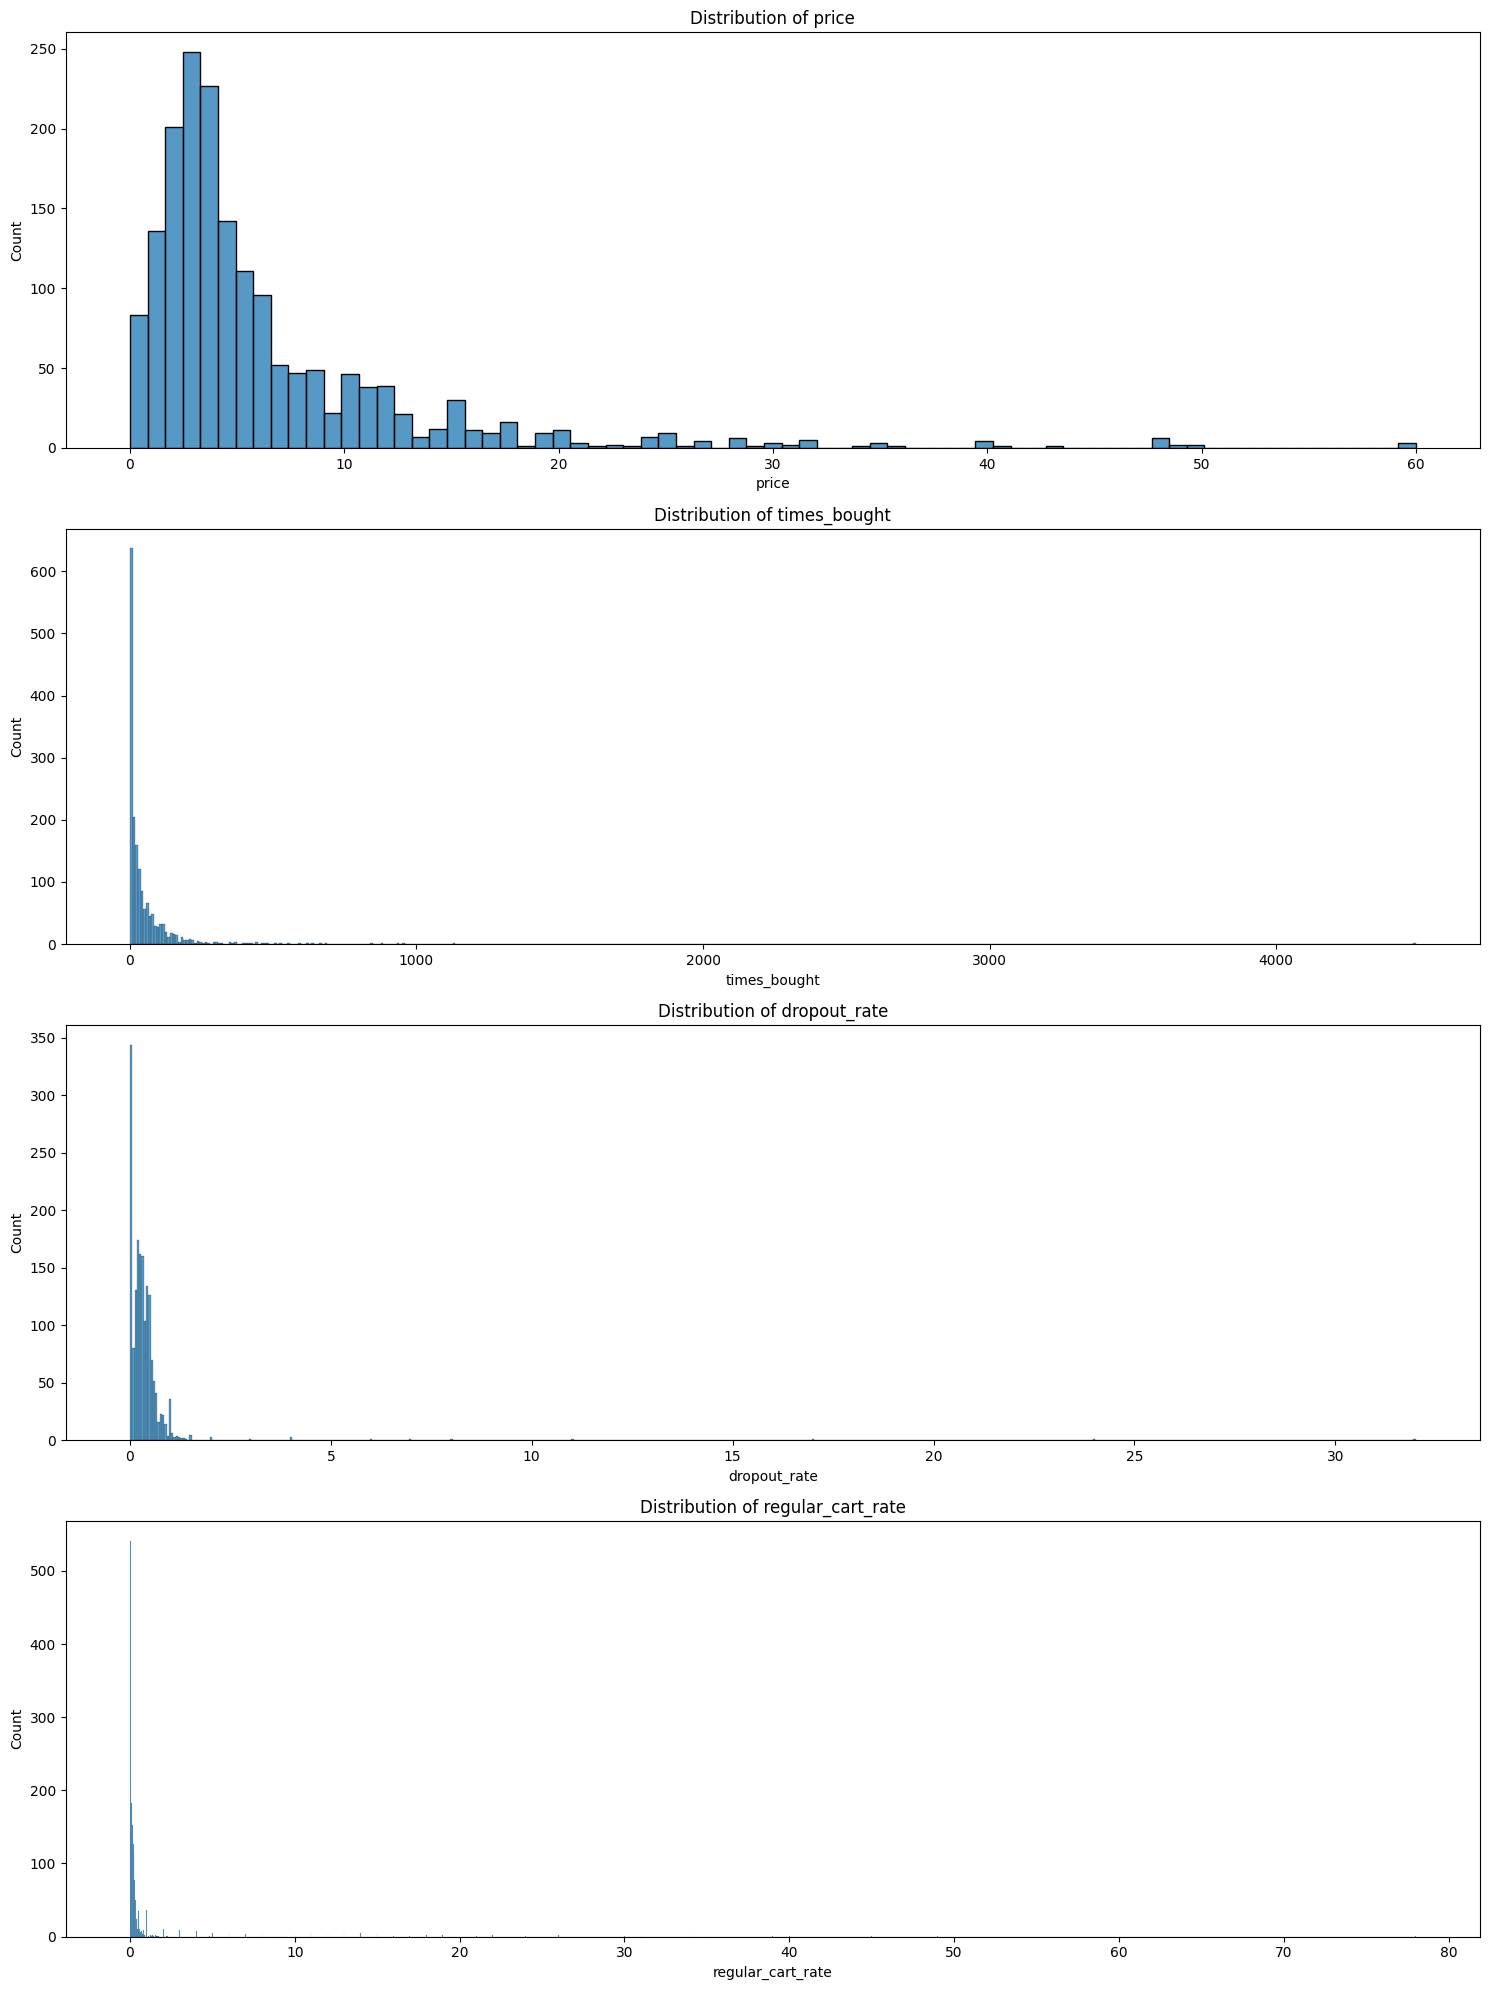

             price  times_bought  dropout_rate  regular_cart_rate
count  1733.000000   1733.000000   1733.000000        1733.000000
mean      6.307351     53.295441      0.383842           0.856168
std       7.107218    141.313936      1.143014           4.041948
min       0.000000      0.000000      0.000000           0.000000
25%       2.490000      4.000000      0.120000           0.000000
50%       3.990000     19.000000      0.272727           0.125000
75%       7.490000     60.000000      0.462500           0.266667
max      59.990000   4487.000000     32.000000          78.000000


In [21]:
numeric_cols = ['price','times_bought', 'dropout_rate', 'regular_cart_rate']
fig, axes = plt.subplots(len(numeric_cols), figsize=(15, 5*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    
    sns.histplot(data=data['inventory'], x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

print(data['inventory'][numeric_cols].describe())

Given the distribution of the variables in inventory dataset we can see that:
- Most of products cost between 0 and 10 M.U
- Most of products have been bought no more than 100 times.
- Some products have been abandoned more times than they have been bought.
- Some products have been added to a regular cart more times than they have been bought.

The 10 products with the higher value of this metrics are shown.

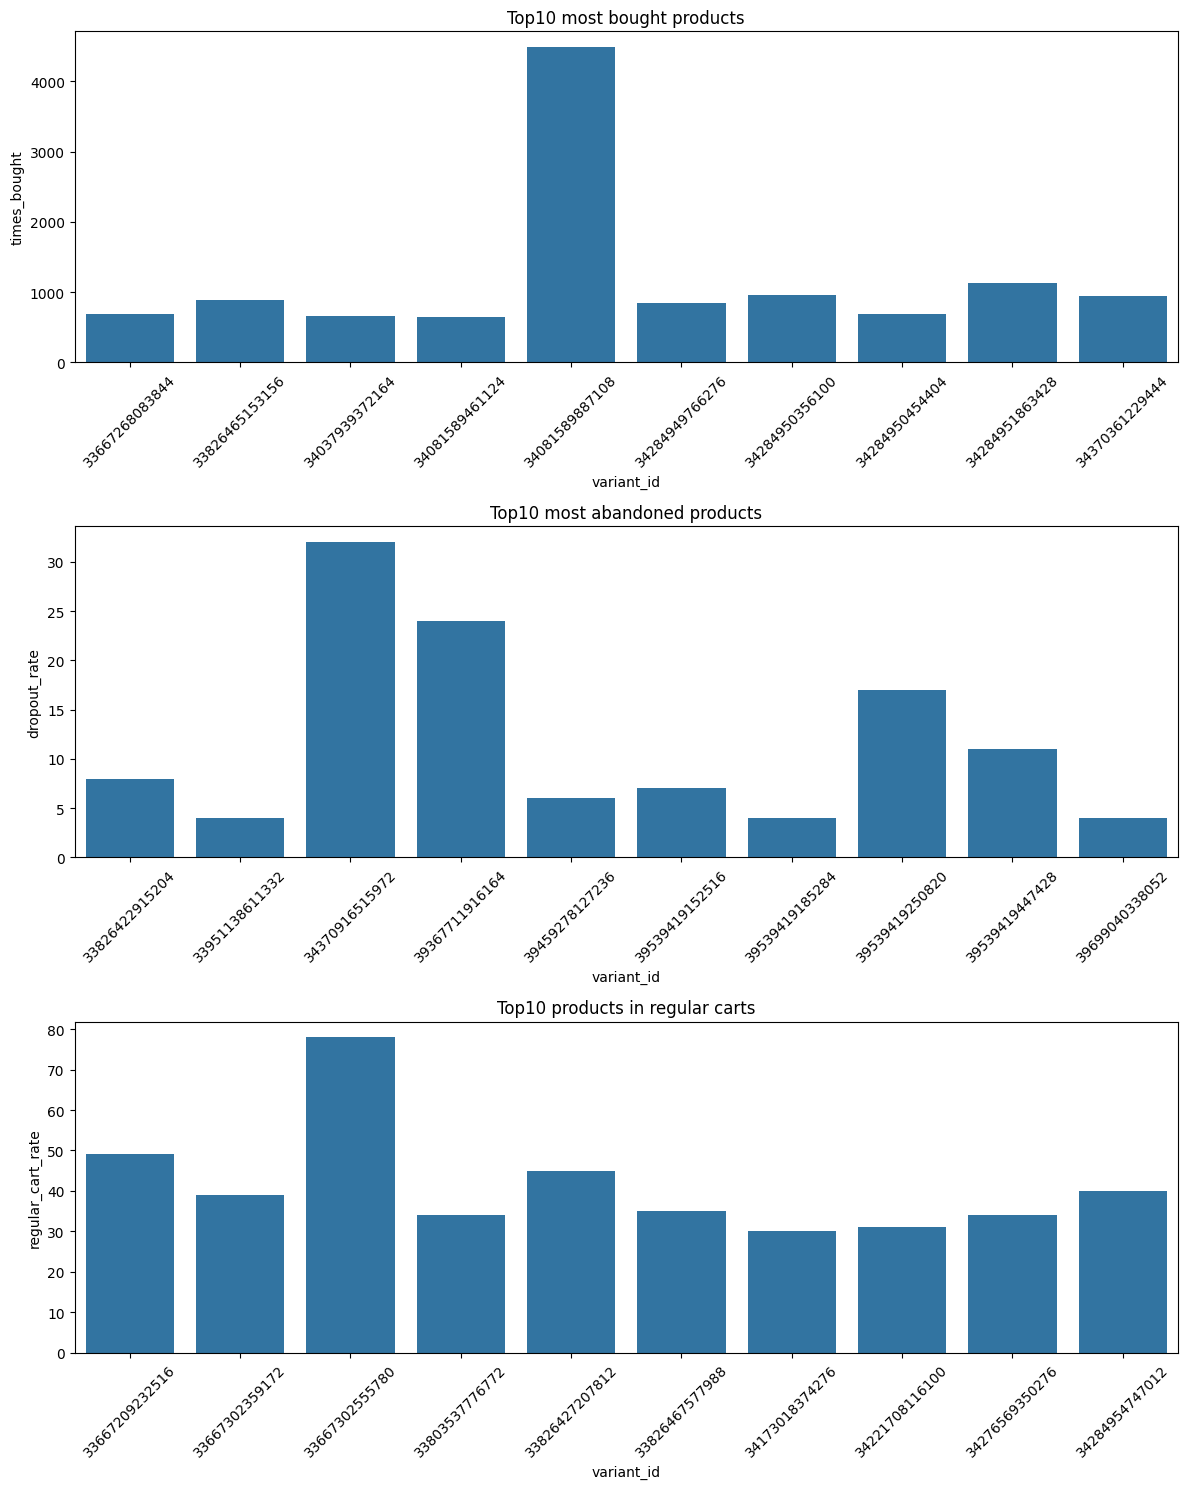

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

top_ordered = data['inventory'].nlargest(10, 'times_bought')
sns.barplot(data=top_ordered, x='variant_id', y='times_bought', ax=axes[0])
axes[0].set_title('Top10 most bought products')
axes[0].tick_params(axis='x', rotation=45)

top_abandoned = data['inventory'].nlargest(10, 'dropout_rate')
sns.barplot(data=top_abandoned, x='variant_id', y='dropout_rate', ax=axes[1])
axes[1].set_title('Top10 most abandoned products')
axes[1].tick_params(axis='x', rotation=45)

top_regular = data['inventory'].nlargest(10, 'regular_cart_rate')
sns.barplot(data=top_regular, x='variant_id', y='regular_cart_rate', ax=axes[2])
axes[2].set_title('Top10 products in regular carts')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Now products are caracterized, users will be studied and new features will be computed. 

In [23]:
prices = dict(zip(data['inventory']['variant_id'], data['inventory']['price']))

data['users']['total_spent'] = 0.0
data['users']['number_of_orders'] = 0

for idx, user in data['users'].iterrows():
    user_orders = data['orders'][data['orders']['user_id'] == user['user_id']]
    
    
    data['users'].loc[idx, 'number_of_orders'] = len(user_orders)
    
    
    total_spent = 0
    for order in user_orders['ordered_items']:
        for product in order:
            if product in prices:
                total_spent += prices[product]
    
    data['users'].loc[idx, 'total_spent'] = round(total_spent, 2)


print(data['users'][['total_spent', 'number_of_orders']].describe())

       total_spent  number_of_orders
count  4983.000000       4983.000000
mean     98.282777          1.745334
std     139.967755          1.905423
min       0.000000          1.000000
25%      47.680000          1.000000
50%      53.330000          1.000000
75%      99.580000          2.000000
max    1969.990000         22.000000


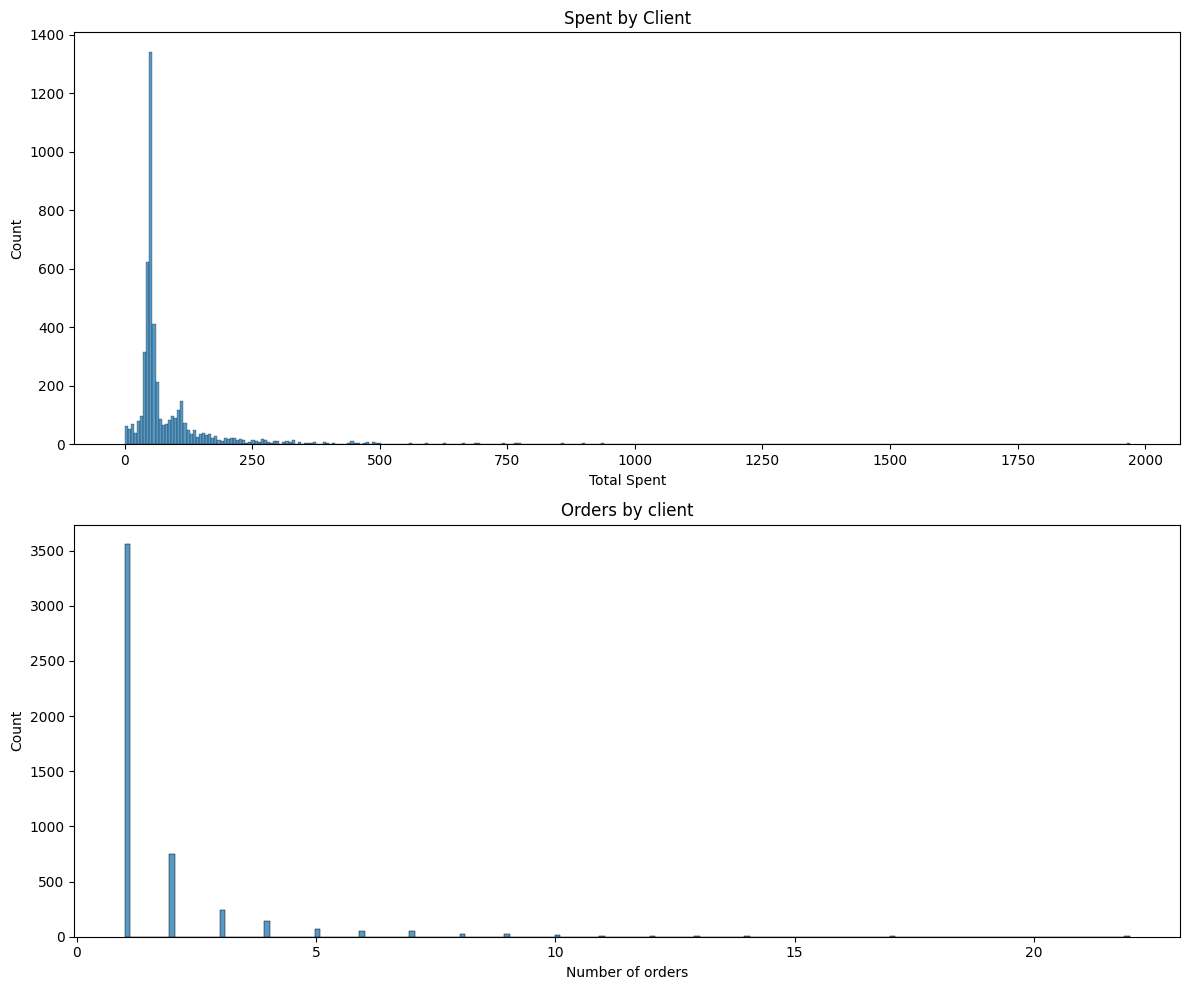

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.histplot(data=data['users'], x='total_spent', ax=axes[0])
axes[0].set_title('Spent by Client')
axes[0].set_xlabel('Total Spent')

sns.histplot(data=data['users'], x='number_of_orders', ax=axes[1])
axes[1].set_title('Orders by client')
axes[1].set_xlabel('Number of orders')

plt.tight_layout()
plt.show()

New insights have been found:
- Most of the users have only spent between 0 and 125 M.U.
- Most of the users have only made one or two orders.

In [28]:
data['users']['regular_cart_value'] = 0.0

prices = dict(zip(data['inventory']['variant_id'], data['inventory']['price']))

for idx, user in data['users'].iterrows():
    user_regular_items = data['regulars'][data['regulars']['user_id'] == user['user_id']]['variant_id']
    regular_cart_value = sum(prices[item] for item in user_regular_items if item in prices)
    data['users'].loc[idx, 'regular_cart_value'] = round(regular_cart_value, 2)

print("\nRegular cart value statistics:")
print(data['users']['regular_cart_value'].describe())


Regular cart value statistics:
count    4983.000000
mean       14.456293
std        80.134406
min         0.000000
25%         0.000000
50%         0.000000
75%         3.990000
max      2492.950000
Name: regular_cart_value, dtype: float64


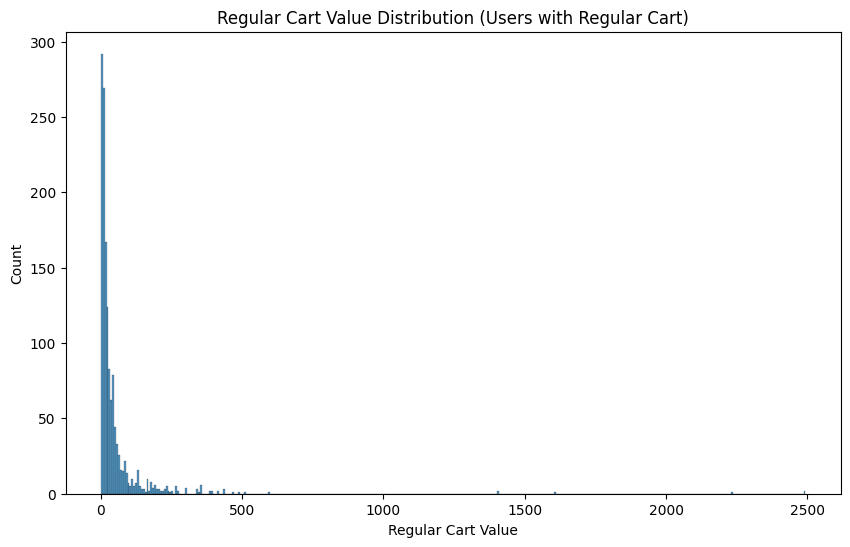


Users with no regular cart: 3,582 (71.9%)

Regular cart value statistics for users with regular cart:
count    1401.000000
mean       51.417352
std       144.739943
min         0.990000
25%         8.990000
50%        19.830000
75%        46.690000
max      2492.950000
Name: regular_cart_value, dtype: float64


In [31]:
total_users = len(data['users'])
users_no_cart = len(data['users'][data['users']['regular_cart_value'] == 0])
pct_no_cart = (users_no_cart / total_users) * 100

# Crear una única figura para usuarios con carrito regular
plt.figure(figsize=(10, 6))
sns.histplot(data=data['users'][data['users']['regular_cart_value'] > 0], 
             x='regular_cart_value')
plt.title('Regular Cart Value Distribution (Users with Regular Cart)')
plt.xlabel('Regular Cart Value')
plt.show()

print(f"\nUsers with no regular cart: {users_no_cart:,} ({pct_no_cart:.1f}%)")
print("\nRegular cart value statistics for users with regular cart:")
print(data['users'][data['users']['regular_cart_value'] > 0]['regular_cart_value'].describe())

Near 72% of users does not use regular cart and most of regular carts have a value of no more than around 100 M.U.